# Preprocessing Single Cell

In [34]:
# Preprocessing
# Load the requisite packages and some additional helper functions.
library(Seurat)
packageVersion("Seurat");
library(Matrix); library(stringr); library(readr)
library(here); library(fitdistrplus)
library(dplyr); library(monocle); library(reticulate)
setwd("~/CS690/chicken_heart/GSE149457_RAW")
# load(file = "cc.genes.rda") 
mito_genes = c("ND1", "ND2", "COX1", "COII", "ATP8", "ATP6", "COX3", "ND3", "ND4L", "ND4", "ND5", "CYTB", "ND6")
samples = c("D4")

cc.genes <- NULL

filepaths <- c("GSM4502475_chicken_heart_scRNAseq_D4_filtered_feature_bc_matrix.h5"
)


prepare_datasets <- function(ind, sample_name, cc.genes, mito_genes){
  # Read data
  data <- Read10X_h5(filename = filepaths[ind])
  seurat.object <- CreateSeuratObject(counts = data, min.cells = 1, min.features = 1, project = sample_name)
  # Mitrocondria
  seurat.object$percent.mito <- PercentageFeatureSet(object = seurat.object, features = mito_genes)
  return(seurat.object)
}

day4 = prepare_datasets(1, samples[1], cc.genes, mito_genes)

# save.image("robjs/all.objs.RData")
# load("robjs/all.objs.RData")

chicken = day4
dim(chicken)
table(chicken$orig.ident)


[1] ‘3.2.2’

[1] 17210  7755


  D4 
7755 

In [35]:
# Normalise, scale, and run PCA
chicken <- NormalizeData(object = chicken, scale.factor = 1e6)
chicken <- FindVariableFeatures(object = chicken, selection.method = "vst", nfeatures = 2000, verbose = FALSE)
chicken <- ScaleData(object = chicken)
dim(GetAssayData(chicken, assay = "RNA", slot = "scale.data"))
# chicken <- RunPCA(object = chicken, assay = "RNA")
# FeaturePlot(chicken, reduction = "pca", c("nCount_RNA", "nFeature_RNA"))
# ElbowPlot(chicken, reduction = "pca")



Centering and scaling data matrix



[1] 2000 7755

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from PHATE to PHATE_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to PHATE_”


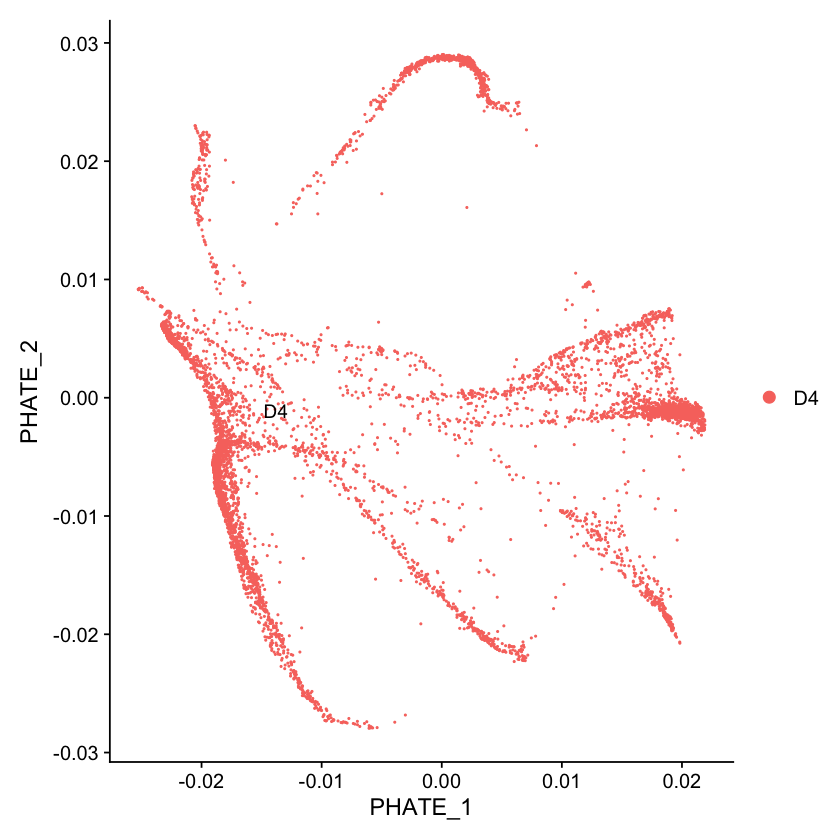

In [36]:
library(phateR)
# chicken_PHATE <- phate(chicken$RNA)
data <- t(GetAssayData(chicken, assay = "RNA", slot = "data"))
tree_chicken <- phate(data, gamma = 0)
chicken@reductions[["phate_gamma0"]] <- CreateDimReducObject(embeddings = tree_chicken$embedding, assay = "RNA", key = "PHATE")
DimPlot(chicken, reduction = "phate_gamma0", label = TRUE)

In [37]:
chicken <- FindNeighbors(object = chicken, assay = "RNA", reduction = "phate_gamma0", dims = 1:2, force.recalc = TRUE, verbose=FALSE)
chicken <- FindClusters(object = chicken, resolution = 0.1, verbose=FALSE)


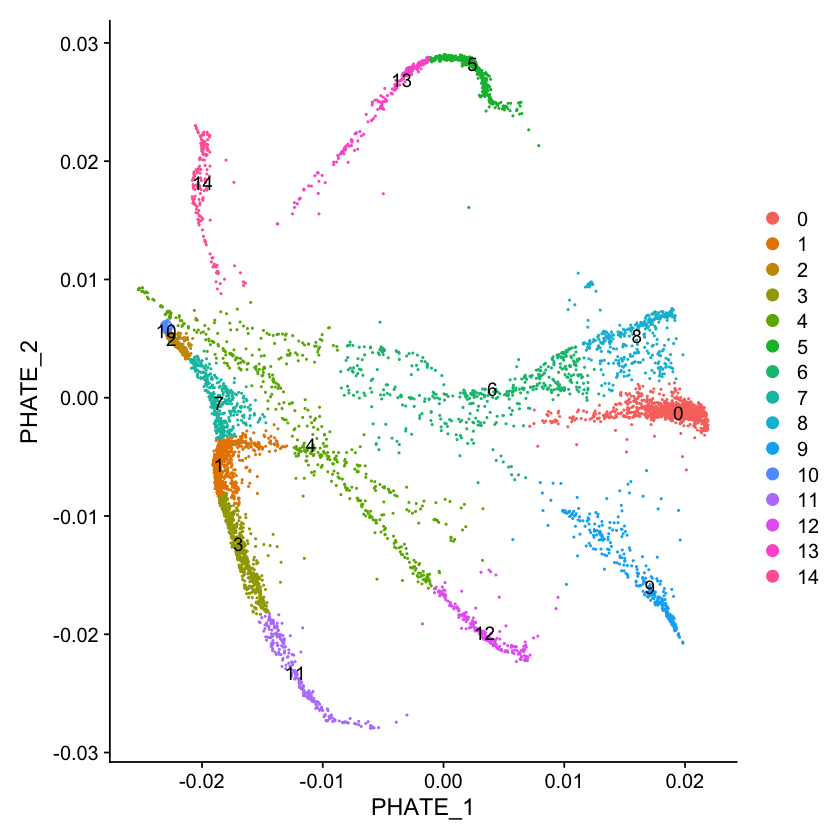

In [38]:
DimPlot(chicken, reduction = "phate_gamma0", label = TRUE)

# Preprocessing Spatial

In [10]:
# load(file = "cc.genes.rda") 
mito_genes = c("ND1", "ND2", "COX1", "COII", "ATP8", "ATP6", "COX3", "ND3", "ND4L", "ND4", "ND5", "CYTB", "ND6")
samples = c("D4-A1-H1", "D4-A1-H2", "D4-A1-H3", "D4-A1-H4", "D4-A1-H5", "D7-B1-H1", "D7-B1-H2", "D7-B1-H3", "D7-B1-H4", "D10-C1-H1", "D10-C1-H2", "D14-D1")
# samples = c("D4-A1", "D7-B1", "D10-C1", "D14-D1")
cc.genes <- NULL

filepaths <- c("GSM4502482_chicken_heart_spatial_RNAseq_D4_filtered_feature_bc_matrix.h5",
               "GSM4502483_chicken_heart_spatial_RNAseq_D7_filtered_feature_bc_matrix.h5",
               "GSM4502484_chicken_heart_spatial_RNAseq_D10_filtered_feature_bc_matrix.h5",
               "GSM4502485_chicken_heart_spatial_RNAseq_D14_filtered_feature_bc_matrix.h5")
prepare_datasets <- function(ind, sample_name, cc.genes, mito_genes){

  seurat.object <- Load10X_Spatial(data.dir = sample_name, filename = filepaths[ind]);
  seurat.object$orig.ident <- sample_name
  seurat.object@project.name <- sample_name
  # Mitrocondria
  seurat.object <- PercentageFeatureSet(object = seurat.object, features = mito_genes, col.name = "percent.mito");
  return(seurat.object)
}

day4_visium <- prepare_datasets(1, "D4", cc.genes, mito_genes)

Centering and scaling data matrix



[1] 24356   747

[1] "Spatial"

PC_ 1 
Positive:  MOXD1, COL1A1, BEGAIN, VIM, COL9A3, PTX3, CRIP1, CHODL, ERMN, COL9A2 
	   HAPLN1, TWIST1, ENSGALG00000015271, CCDC80, CSRP2, CD3E, TF, P3H2, TGFB2, ENSGALG00000046914 
	   RSPO3, ANGPTL1, COL9A1, CALB1, CDH11, HAS2, TBPL2, TSHZ2, SCX, GPC1 
Negative:  IGFBP7, ADCYAP1, NDUFA5, UQCRQ, chPKCI, NPPA, TUBB6, ANXA6, SESTD1, PSMC6 
	   GJA5, CYCS, SEM1, HSBP1, ENSGALG00000000629, ATP5F1C, ATP2A2, MYL9, TRIM55, ENSGALG00000005257 
	   FHL2, FKBP1B, NDUFS7, RPL14, CFL2, SOD2, TXNDC17, GTF2H5, PSMA2, PEBP1 
PC_ 2 
Positive:  TMSB4X, MOXD1, CHODL, VIM, CRIP1, CNMD, GPC1, CENPW, COL9A2, PTX3 
	   ENSGALG00000046914, BRT-1, ENSGALG00000015271, CSRP2, RPS12, COL1A1, ANGPTL2, CDH11, HAPLN1, MSX1 
	   ANXA2, MFAP2, S100A10, TGFB2, ENSGALG00000036263, HHEX, CCDC80, COL9A3, DSTN, CD9 
Negative:  ACTC1, TNNC1, MYL2, MYL3, TPM4, MYH15, TNNI1, NPPA, FKBP1B, ADCYAP1 
	   RBM24, ACTA1, ATP2A2, ENSGALG00000020788, HSPB1, GJA5, BVES, MYL9, BMP10, ENSGALG00000005257 
	   ENSGALG00000028183, SE

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 747
Number of edges: 30775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6634
Number of communities: 8
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:10:07 UMAP embedding parameters a = 0.9922 b = 1.112

23:10:07 Read 747 rows and found 20 numeric columns

23:10:07 Using Annoy for neighbor search, n_neighbors = 30

23:10:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:10:08 Writing NN index file to temp file /var/folders/2n/2j_z71v57jj0s74h0tgrfb9w0000gn/T//Rtmpn8imKI/file5732ae49e27

23:10:08 Searching Annoy index using 1 thread, search_k = 3000

23:10:08 Annoy recall = 100%

23:10:09 Commencing smooth kNN distance calibratio

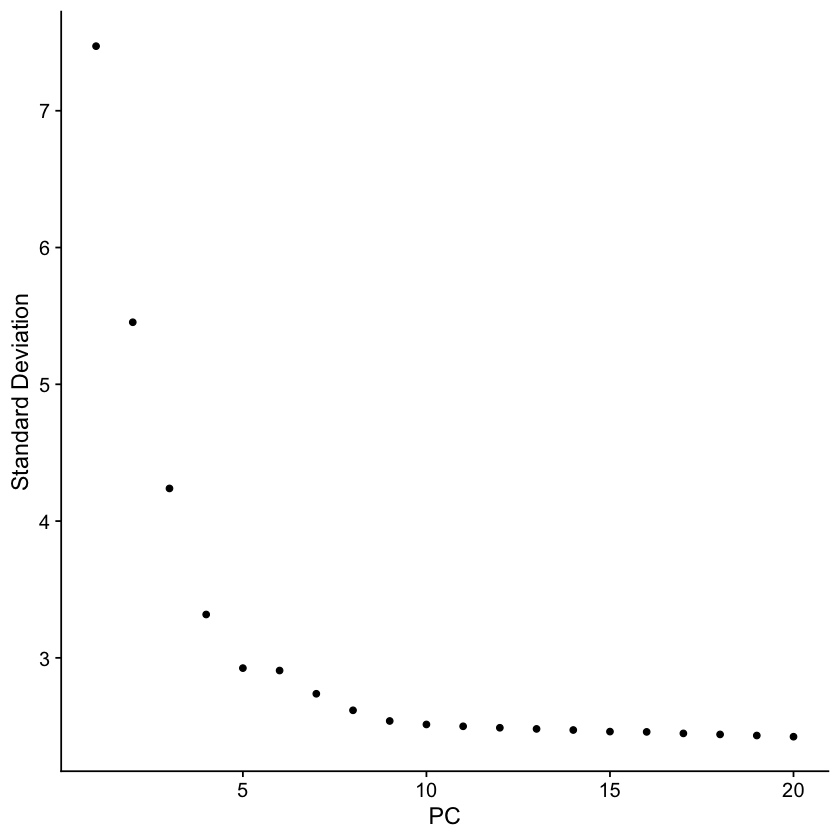

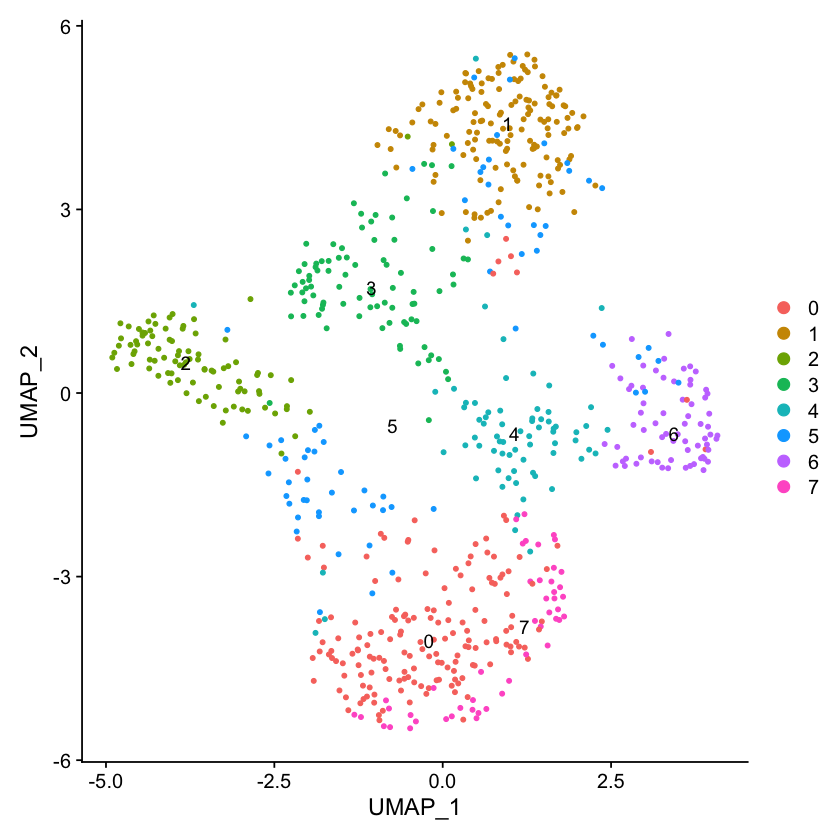

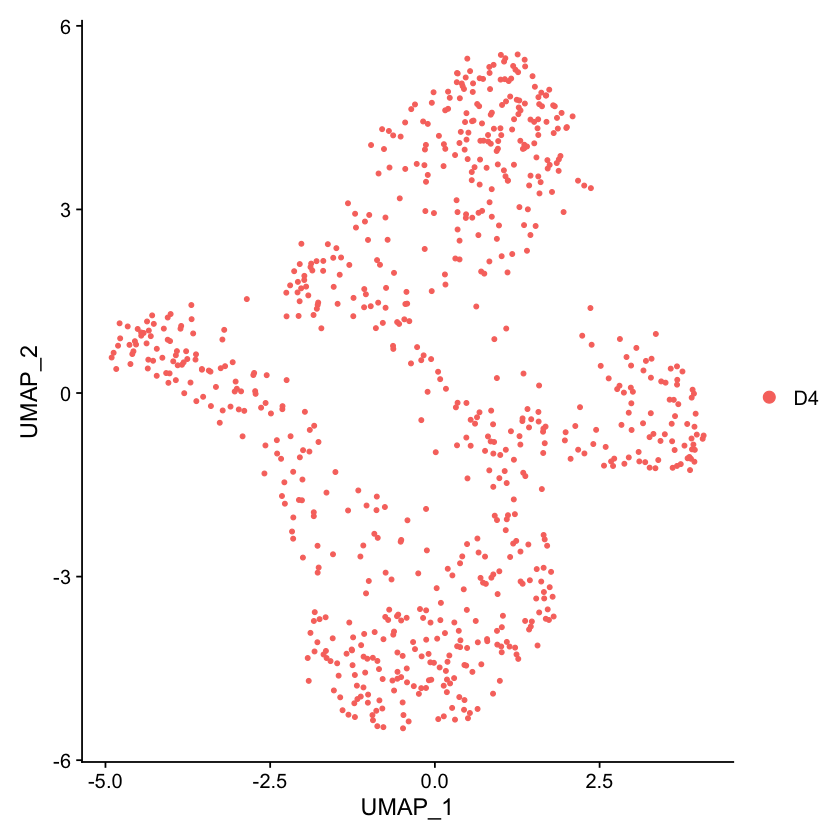

In [11]:
chicken_visium <- day4_visium

# Preprocessing of spatial RNAseq data
chicken_visium <- NormalizeData(chicken_visium) %>% FindVariableFeatures() %>% ScaleData()
dim(chicken_visium)
DefaultAssay(chicken_visium)

# Run PCA on spatial RNAseq data
chicken_visium <- RunPCA(object = chicken_visium)
ElbowPlot(chicken_visium)

# Run clustering and UMP reduction of spatial RNAseq data
chicken_visium <- FindNeighbors(object = chicken_visium, dims=1:20, force.recalc = TRUE)
chicken_visium <- FindClusters(object = chicken_visium, resolution=1.0)
chicken_visium <- RunUMAP(object = chicken_visium, dims = 1:20)
DimPlot(chicken_visium, reduction = "umap", group.by = "Spatial_snn_res.1", label = TRUE)
DimPlot(chicken_visium, reduction = "umap", group.by = "orig.ident")

# save(chicken_visium, file = "robjs/chicken_visium.4.Robj")
# load("robjs/chicken_visium.Robj")


In [12]:
DefaultAssay(chicken) <- "RNA"
DefaultAssay(chicken_visium) <- "Spatial"

# Anchor Integration

In [13]:
anchors <- FindTransferAnchors(reference = chicken, query = chicken_visium, reduction = "cca", verbose=FALSE)

Warning message in RunCCA.Seurat(object1 = reference, object2 = query, features = features, :
“Running CCA on different assays”


In [18]:
# shared nearest neighbor
Idents(chicken) <- chicken$RNA_snn_res.0.1
chicken <- RenameIdents(chicken, `0` = "cells0", `1` = "cells1", `2` = "cells2",
                                   `3` = "cells3", `4` = "cells4", `5` = "cells5",
                                   `6` = "cells6",
                                   `7` = "cells7", `8` = "cells8", `9` = "cells9", `10` = "cells10", `11` = "cells11", `12` = "cells12", `13` = "cells13", `14` = "cells14")
chicken$celltypes.0.1 <- Idents(chicken)

In [19]:
predictions.assay <- TransferData(anchorset = anchors, refdata = chicken$celltypes.0.1, prediction.assay = TRUE, 
                                  weight.reduction = chicken_visium[["pca"]])

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [20]:
chicken_visium[["predictions"]] <- predictions.assay
dim(GetAssayData(chicken_visium, assay = "predictions"))


[1]  16 747

In [21]:
prediction.scores <- as.data.frame(t(GetAssayData(chicken_visium, assay = "predictions")))

,cells4,cells1,cells2,cells9,cells11,cells12,cells0,cells3,cells7,cells6,cells5,cells10,cells8,cells13,cells14,max
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCGAACGAAATC-1,0,0.02071803,0.5327978,0,0,0,0.01237418,0.1417763,0.2923337,0,0,0,0,0,0,0.5327978


In [22]:
# Adding cell type predictions in meta data as well
chicken_visium <- AddMetaData(chicken_visium, metadata = as.data.frame(t(GetAssayData(chicken_visium, assay = "predictions"))))
head(chicken_visium@meta.data)

# Define cell type with maximum prediction score as spot type 
prediction.scores <- as.data.frame(t(GetAssayData(chicken_visium, assay = "predictions")))
prediction.scores$max <- NULL
sum(is.na(prediction.scores))
prediction.scores$celltype_prediction <- NA
dim(prediction.scores)
for(i in 1:nrow(prediction.scores)){
  prediction.scores$celltype_prediction[i] <- colnames(prediction.scores)[prediction.scores[i,1:15] == max(prediction.scores[i,1:15])]
}

table(prediction.scores$celltype_prediction)
chicken_visium$celltype_prediction <- prediction.scores$celltype_prediction

,orig.ident,nCount_Spatial,nFeature_Spatial,percent.mito,Spatial_snn_res.1,seurat_clusters,cells4,cells1,cells2,cells9,⋯,cells0,cells3,cells7,cells6,cells5,cells10,cells8,cells13,cells14,max
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCGAACGAAATC-1,D4,1406,737,13.72688,1,1,0.000000000,0.020718034,0.532797773,0.000000000,⋯,0.012374183,0.141776302,0.2923337079,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0,0.5327978
AAACCGGAAATGTTAA-1,D4,10539,2635,17.07942,0,0,0.007367648,0.004522447,0.001018122,0.000000000,⋯,0.000000000,0.182651941,0.0004561245,0.006035133,0.02085320,0.000000000,0.00000000,0.000000000,0,0.6318318
AAACGAGACGGTTGAT-1,D4,18973,3725,12.76024,0,0,0.016257371,0.011288918,0.000000000,0.088759498,⋯,0.003349645,0.001613219,0.0000000000,0.260564480,0.43773357,0.000000000,0.10349348,0.000000000,0,0.4377336
AAACGGGCGTACGGGT-1,D4,10977,2617,11.56965,2,2,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.993470197,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0.00000000,0.006529803,0,0.9934702
AAACTGCTGGCTCCAA-1,D4,3918,1463,14.29301,5,5,0.020196634,0.043679566,0.003279875,0.380064222,⋯,0.385428271,0.041429329,0.0012702485,0.020378781,0.03644702,0.000000000,0.06351718,0.000000000,0,0.3854283
AAATACCTATAAGCAT-1,D4,9592,2444,10.66514,2,2,0.000000000,0.000000000,0.000000000,0.002521043,⋯,0.992242045,0.000000000,0.0000000000,0.000000000,0.00000000,0.005236912,0.00000000,0.000000000,0,0.9922420


[1] 0

[1] 747  16

Warning message in prediction.scores$celltype_prediction[i] <- colnames(prediction.scores)[prediction.scores[i, :
“number of items to replace is not a multiple of replacement length”
Warning message in prediction.scores$celltype_prediction[i] <- colnames(prediction.scores)[prediction.scores[i, :
“number of items to replace is not a multiple of replacement length”
Warning message in prediction.scores$celltype_prediction[i] <- colnames(prediction.scores)[prediction.scores[i, :
“number of items to replace is not a multiple of replacement length”
Warning message in prediction.scores$celltype_prediction[i] <- colnames(prediction.scores)[prediction.scores[i, :
“number of items to replace is not a multiple of replacement length”
Warning message in prediction.scores$celltype_prediction[i] <- colnames(prediction.scores)[prediction.scores[i, :
“number of items to replace is not a multiple of replacement length”
Warning message in prediction.scores$celltype_prediction[i] <- colnames(prediction.sc


 cells0  cells1 cells10 cells11 cells12 cells13 cells14  cells2  cells3  cells4 
    199      62      19      82      63       5       3      73      24      39 
 cells5  cells6  cells7  cells8  cells9 
    110       7       7      12      42 

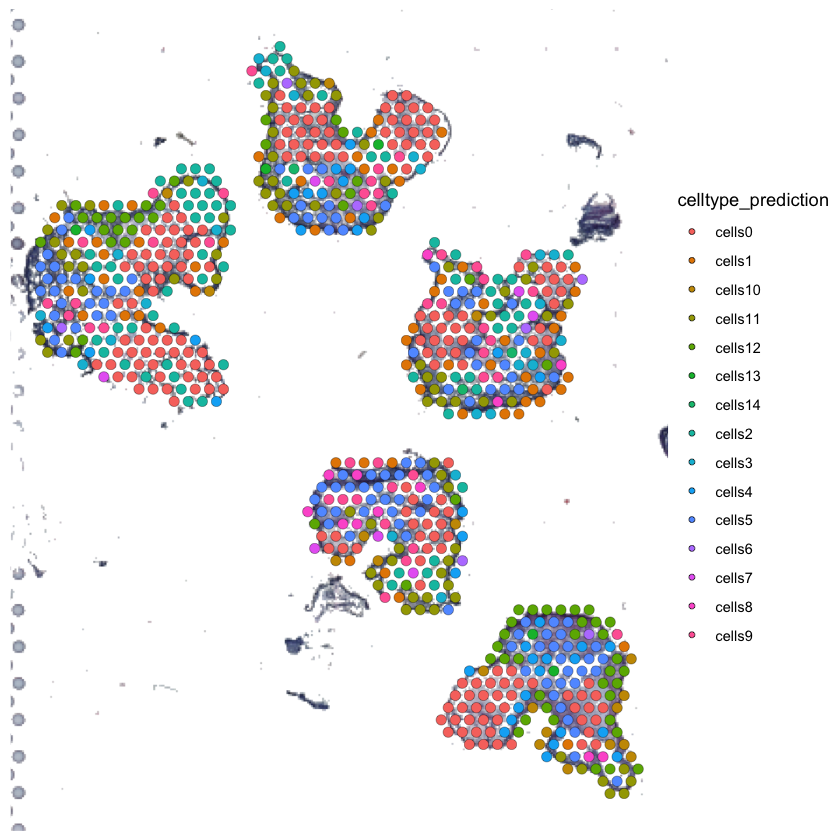

In [23]:
# Spatial -> 0-7
# SC -> 0-9
DefaultAssay(chicken_visium) <- "predictions"
# SpatialFeaturePlot(chicken_visium, features=c("cells0","cells1"))
# SpatialDimPlot(chicken_visium)
SpatialPlot(chicken_visium, group.by="celltype_prediction")

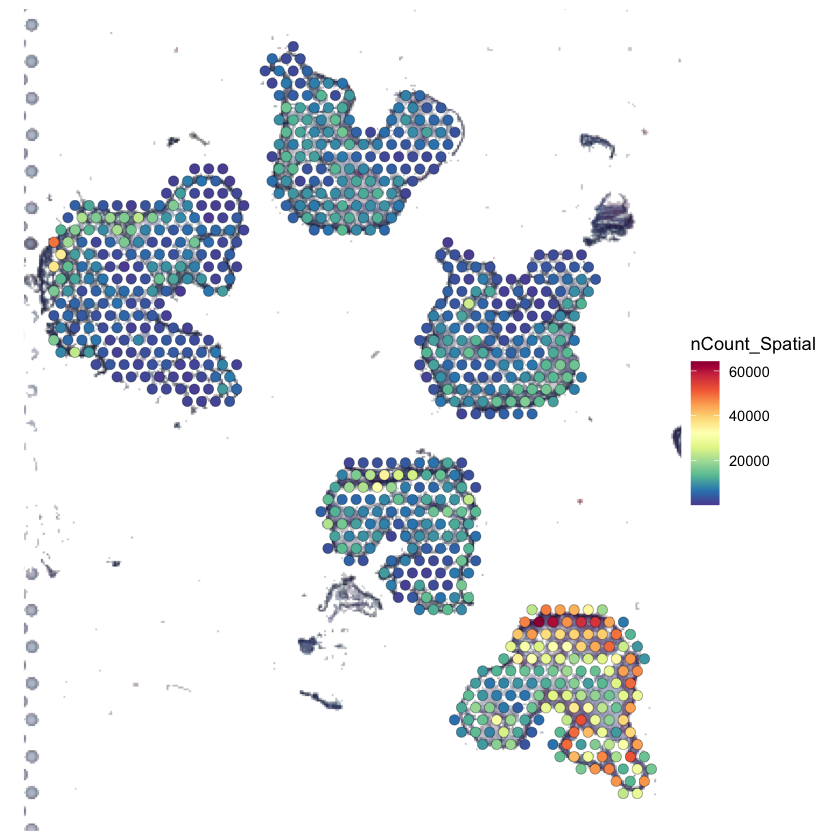

In [24]:
# SpatialFeaturePlot(chicken_visium, )
SpatialFeaturePlot(chicken_visium, features = "nCount_Spatial") + theme(legend.position = "right")

## Cell Spot Similarity map using anchor integration

In [26]:
# chicken_visium@meta.data
# #####################  This section calculates the cell spot similarity map ############################
# Transfer cellnames from scRNAseq to spatial using the anchor based approach to get a cell spot similairy map
chicken$cellname <- colnames(chicken)
predictions.assay <- TransferData(anchorset = anchors, refdata = chicken$cellname, prediction.assay = TRUE, 
                                  weight.reduction = chicken_visium[["pca"]])

# Adding cellname predictions to original seurat object
chicken_visium[["predictions_cells"]] <- predictions.assay
dim(GetAssayData(chicken_visium, assay = "predictions_cells"))

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from predictions_cells_ to predictionscells_”


[1] 7756  747

## Combining pseudotime and Cell spot similarity map

In [27]:
prediction.scores <- as.data.frame(t(GetAssayData(chicken_visium, assay = "predictions_cells")))
# load("chicken_after_phate.Robj")
dim(prediction.scores)
colnames(prediction.scores)[prediction.scores[1,1:5653] > 0.0]
prediction.scores[1,1:5653]

for(i in 1:nrow(prediction.scores)){
  temp <- colnames(prediction.scores)[prediction.scores[i,1:5653] > 0.0]
  temp <- temp[temp %in% colnames(chicken)]
  prediction.scores$d4_PHATE1[i] <- mean(chicken@reductions$phate_gamma0@cell.embeddings[,"PHATE_1"][temp])
}
chicken_visium$d4_PHATE1 <- prediction.scores$d4_PHATE1

dim(prediction.scores)
prediction.scores$max <- NULL

[1]  747 7756

[1] "AAGACTCAGCAAGTCG-1" "ACTTAGGCAAAGCTCT-1" "AGAGCAGTCCGAAATC-1"
 [4] "AGCGATTAGTACTGGG-1" "ATACTTCAGAGGTCGT-1" "ATAGGCTTCCATCAGA-1"
 [7] "ATGAGGGAGACACACG-1" "ATGGTTGTCCCTAGGG-1" "CACAGGCTCCAACCGG-1"
[10] "CAGCAGCGTAGGATAT-1" "CCAATGAAGGCGAACT-1" "CCACGAGAGTATGTAG-1"
[13] "CCTGTTGCAGATTAAG-1" "CGAAGGAAGGACTATA-1" "CGCCAGATCTACTTCA-1"
[16] "CTCCATGTCCGTAATG-1" "GAAGGGTAGAAGGTAG-1" "GAAGTAACACTTTATC-1"
[19] "GAGAAATAGCCAGACA-1" "GAGTGTTCAACCCTCT-1" "GAGTTGTTCGAATGCT-1"
[22] "GATAGAAGTAGAGACC-1" "GATCATGAGAGGGTAA-1" "GATGTTGTCATCTGTT-1"
[25] "GCACGGTCACACGGTC-1" "GCCAACGCACTTCAAG-1" "GGGACTCTCCGGCAAC-1"
[28] "GTAGTACCAGGCTACC-1" "GTGGAAGGTTTAAGGA-1" "GTTCTATTCCCATTCG-1"
[31] "GTTCTATTCCGTCAAA-1" "GTTGCTCAGGTGGGTT-1" "TAGGAGGCATCCGGCA-1"
[34] "TCGAAGTGTGACGTCC-1" "TCTATCAGTTATAGAG-1" "TGAATCGAGCGATCGA-1"
[37] "TGGGATTTCGGTCATA-1" "TGGTACAGTTCCACAA-1" "TTACCATAGAGACAAG-1"
[40] "TTCAGGAGTCTATGAC-1" "TTTCAGTGTGGCTACC-1"

,AAACCCAAGCTAAACA-1,AAACCCACAAATCAAG-1,AAACCCACAACGGGTA-1,AAACCCACACCACTGG-1,AAACCCACACTCCGGA-1,AAACCCACACTTACAG-1,AAACCCACATCTTTCA-1,AAACCCACATGAATAG-1,AAACCCAGTAGCGCCT-1,AAACCCATCCGACGGT-1,⋯,TAAGCACGTCCTACAA-1,TAAGCACGTCCTGTCT-1,TAAGCACGTTGTAAAG-1,TAAGCCAGTCGACGCT-1,TAAGCCAGTCGCTGCA-1,TAAGCCAGTCTCGGGT-1,TAAGCCAGTGTAGTGG-1,TAAGCCATCAAGAGGC-1,TAAGCCATCGTTCATT-1,TAAGCCATCTTTCAGT-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCGAACGAAATC-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1]  747 7757

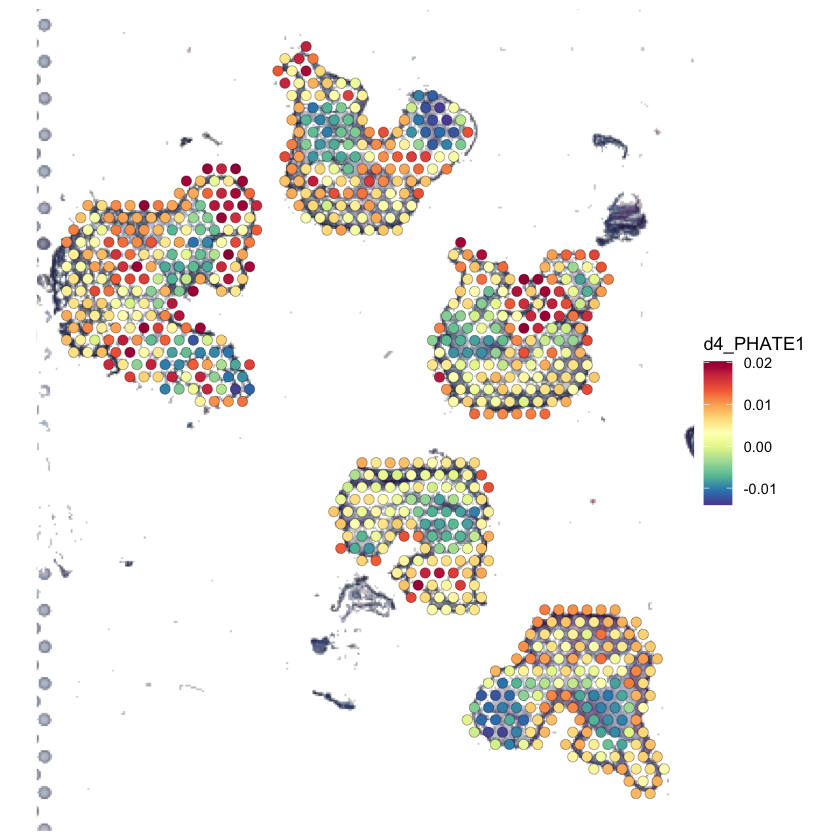

In [33]:
SpatialFeaturePlot(chicken_visium, features = "d4_PHATE1") + theme(legend.position = "right")